# MC866 Project 1

## Group
*Fabio Camargo Ricci*: **170781oão Vitor Araki Gonçalves*: **176353**

## Introduction

The project was separated in two parts that resulted in two reports, this is the first that tackles the kmeans algorithm with the provided dataset and a second problem with more dimensions. The analysis made in both are mostly the same but using the two different algorithms chosen. The second part will tackle the Gaussian Mixture Model method and make comparisons with the approach using kmeans.

The work was separated between João and Fabio, with João responsible for the kmeans implementation and analysis and Fabio responsible for the GMM method.

## g Methods (The First Algorithm)

## K-Means

In [18]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [19]:
class KMeans:
    def __init__(self, X, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.X = X
        self.rand = np.random.RandomState(random_state)
        self.centroids = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.X)[:self.n_clusters]
            

    def __distances_by_cluster(self, data=None):
        if data is None:
            data = self.X
         
        distances = np.array([])
        for c in self.centroids:
            d = np.sqrt(np.power(data - c, 2).sum(axis=1))
            distances = np.append(distances, d)
        distances = distances.reshape((self.n_clusters, len(data)))
        distances = distances.T # list of distances of each centroid to the element in the given index (equivalent to zip(*distances) but faster)
        return distances

    def elbow_sse(self):
        distances = self.__distances_by_cluster()
        distances = np.min(distances, axis=1) # get only the min distance for each data point (the distance the its centroid)
        distances = np.power(distances, 2)
        return distances.sum()

    def silhouette_coefficient(self):
        result = []

        cluster_centroid_distances = self.__distances_by_cluster(data=self.centroids) # calculates the distance between the centroids to each other

        for i in range(cluster_centroid_distances.shape[0]):
            cluster_centroid_distances[i][i] = np.inf # make the distance of the cluster to itself infinite
        closest_cluster = np.argmin(cluster_centroid_distances, axis=1) # contains index of the cluster closest to the one in the array index
        clusters = self.clusters() # the cluster classification for each row of data
        for i in range(len(self.centroids)): # will calculate metrics from each cluster's perspective
            result.append([])
            closest_cluster_data = self.X[clusters == closest_cluster[i]] # filter only data that belongs to the closest cluster
            cluster_data = self.X[clusters == i] # filter only data from the current cluster
            # for each row of data in the cluster, we'll calculate the silhouette coefficient
            for row in cluster_data:
                # get the distances between the current data point and all the other points inside the same cluster
                inside_distances = np.sqrt(np.power(cluster_data - row, 2).sum(axis=1))
                # get the distances between the current data point and the other points inside the closest cluster
                closest_cluster_distances = np.sqrt(np.power(closest_cluster_data - row, 2).sum(axis=1))

                a = np.mean(inside_distances)
                b = np.mean(closest_cluster_distances)
                s = (b-a)/(max(a, b))
                result[i].append(s)

        return result

    # returns an array of what cluster each point of the dataset belongs to
    def clusters(self, data=None):
        distances = self.__distances_by_cluster(data=data)
        return np.argmin(distances, axis=1) # the index of which centroid each data point belongs to

    # Move the centroids to their cluster centers until convergence
    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, len(self.centroids)):
                data_filter = clusters == i
                filtered_data = self.X[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = avg/filtered_data.shape[0]
                
                for j in range (0, avg.shape[0]):
                    if self.centroids[i][j] != avg[j]:
                        changed = True
                        self.centroids[i][j] = avg[j]
            if not changed:
                break
        
        # print(f"converged in {iterations} iterations")
        # print("--- %s seconds ---" % (time.time() - start_time))




### The Dataset
First we will run tests using the provided 2d dataset, splitting it in 90% for training and 10% for test.

Afterwards we'll run the same proccess on another dataset with more dimensions.

In [20]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

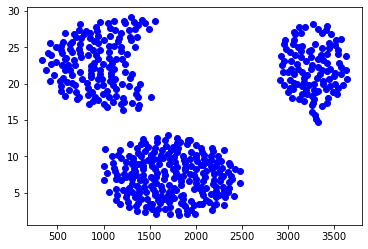

In [21]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [22]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)

The centroids are initialy positioned at random points of the dataset provided for training.

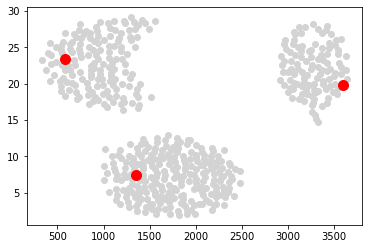

In [23]:
# initialize centroids and show their initial position in the chart
k.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

We use the clusters method to get to which centroid each data point is closest to

In [24]:
k.clusters()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Initially without any fitting, the clusters provided are the following

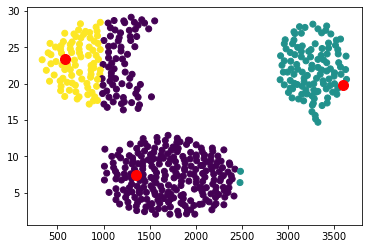

In [25]:
# Result of clusters before any fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [26]:
k.fit()

### Results after fitting with the raw training data

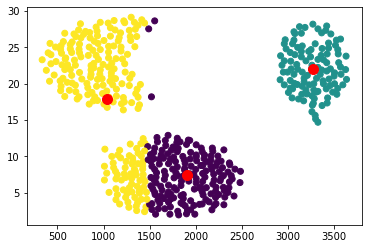

In [27]:
# Result of clusters after fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

As we can observe, we have a problem regarding the data normalization. Since the scale of the X axis of the chart is much larger than the Y axis. That inflates the euclidian distance in the X direction, so we get results that would not be intuitively expected.

### Normalizing the data
To solve that issue, we will normalize the data to fit in the interval \[0, 1\]

In [28]:
max_values = df_train.max()
df_train = df_train / max_values
df_test = df_test / max_values
df_train.head()

0         1
0  0.427785  0.982847
1  0.409904  0.945111
2  0.397524  0.972556
3  0.389271  0.987993
4  0.378267  0.962264

Then we'll run the kmeans operation again and check the results

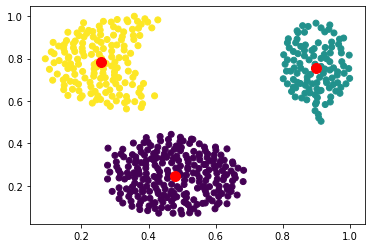

In [29]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)
k.init_centroids()
k.fit()

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

From this we can observe the importance of data normalization when using kmeans for clustering data. Now we can observe that the expected intuitive result was achieved, so we will validate the results with the test data.

## Checking the test data distribution

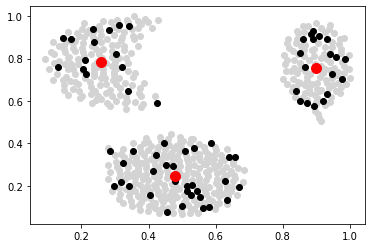

In [30]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

## How the test data was classified using the prefitted kmeans model

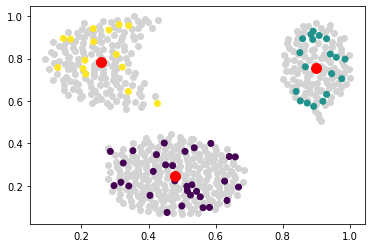

In [31]:
c = k.clusters(data=df_test.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

### Metrics

Now we will verify the results using a few metrics.

### The Elbow Method
We'll run the kmeans algorithm with different amounts of clusters and get the sum of the squared distance of each point of a cluster to it's centroid. 

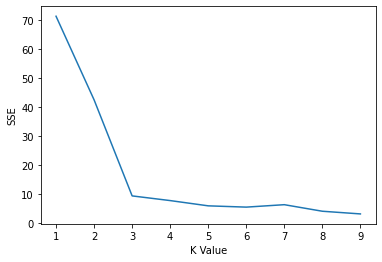

In [32]:
sse_values = []
cluster_range = range (1, 10)
for i in range (1, 10):
    k = KMeans(X=df_train.to_numpy(), n_clusters=i)
    k.init_centroids()
    k.fit()
    sse_values.append(k.elbow_sse())
    
fig, ax = plt.subplots()
ax.plot(cluster_range, sse_values) # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
ax.set_xlabel("K Value")
ax.set_ylabel("SSE")
plt.show()


With the elbow method we can easily verify that 3 clusters intuitively chosen really is the optimal amount. 

### Silhouette Coeficient
Now lets do another analysis of the number of clusters using the silhouette coefficient for different configurations. We expect to receive the highest score with K=3.

For 2 clusters, got silhouette score of 0.5124899085625445
For 3 clusters, got silhouette score of 0.7076548310820421
For 4 clusters, got silhouette score of 0.5354743972693554
For 5 clusters, got silhouette score of 0.5331853679766797
For 6 clusters, got silhouette score of 0.46861968351105815
For 7 clusters, got silhouette score of 0.5168618027598113
For 8 clusters, got silhouette score of 0.43949531968192046
For 9 clusters, got silhouette score of 0.402210624252111


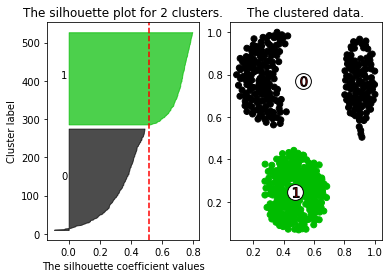

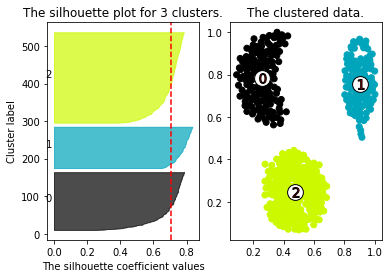

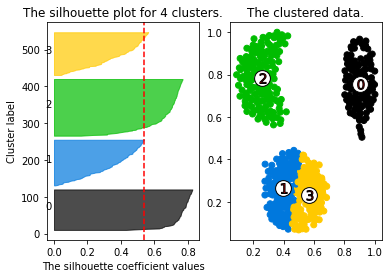

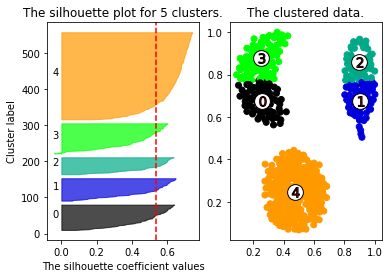

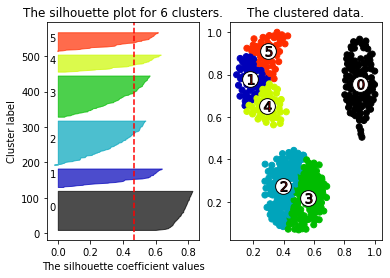

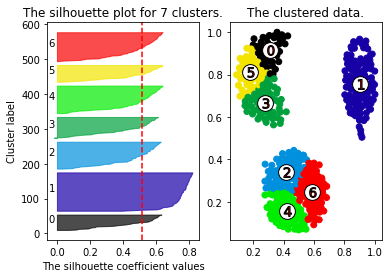

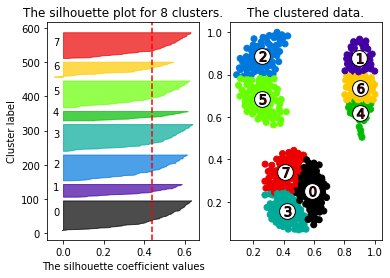

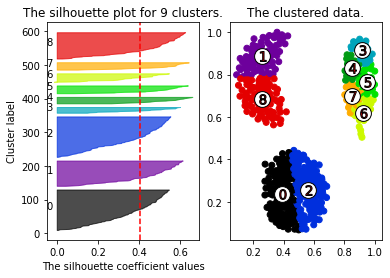

In [33]:
for num_clusters in range (2, 10):
    k = KMeans(X=df_train.to_numpy(), n_clusters=num_clusters)
    k.init_centroids()
    k.fit()
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    print(f"For {num_clusters} clusters, got silhouette score of {silhouette_avg}")

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_values = s[i]
        ith_cluster_values.sort()
        size_cluster_i = len(ith_cluster_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for {num_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    silhouette_avg = np.average(np.array(flat_s))
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    c = k.clusters()
    colors = cm.nipy_spectral(c.astype(float) / num_clusters)
    ax2.set_title("The clustered data.")
    ax2.scatter(df_train.iloc[:, 0].values, df_train.iloc[:, 1].values, c=colors) # the data
    ax2.scatter(k.centroids[:, 0], k.centroids[:, 1], marker='o', c="white", alpha=1, s=250, edgecolor='k')
    for i, c in enumerate(k.centroids):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, s=100, alpha=1, edgecolor='k', c='red')

plt.show()

And as expected, we received the highest score for 3 clusters. Again confirming our results.

## Second problem
Now we'll tackle a problem with many more dimensions using clustering algorithms. As a proposed problem we'll attempt to solve the handwritten digits dataset using only unsupervised clustering.

We are using the skelearn digits dataset because it's an already scalled down version of the MNIST dataset, where each image has only 64 features, greatly reducing the time required to fit the models.

Since there are 10 classes in the dataset (the ten digits), an intuitive value for K would be 10, but we will validate that value using the analysis that we showed previously.

First we'll fetch the *digits* dataset from scikit, and do normalizations

Features 64
[[0.     0.     0.5    ... 1.     0.875  0.    ]
 [0.     0.     0.1875 ... 0.25   0.     0.    ]
 [0.     0.     0.0625 ... 0.5    0.     0.    ]
 ...
 [0.     0.     0.5    ... 0.     0.     0.    ]
 [0.     0.     0.125  ... 0.4375 0.     0.    ]
 [0.     0.3125 1.     ... 1.     0.25   0.    ]]


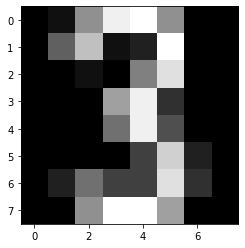

In [34]:
X, y = load_digits(return_X_y=True) # fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

scalling_factor = np.max(X_train)
X_train = X_train / scalling_factor
X_test = X_test / scalling_factor
print("Features", X_train.shape[1])
print(X_test)

plt.imshow(X_train[2].reshape((8,8)), cmap='gray', vmin=0, vmax=1)
plt.show()

### The elbow analysis
For this test, we will fit the model 20 time for each value for K, and then we will consider the average value of the sse for those runs.

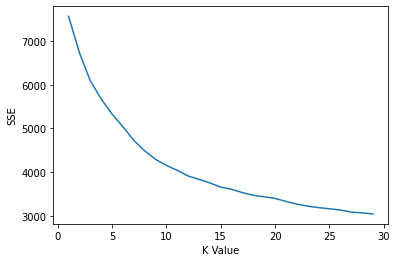

In [35]:
sse_values = []
cluster_range = range (1, 30)
for i in cluster_range:
    values_avg_sse = np.array([])
    for j in range(20):
        k = KMeans(X=X_train, n_clusters=i)
        k.init_centroids()
        k.fit()
        values_avg_sse = np.append(values_avg_sse, k.elbow_sse())

    sse_values.append(np.average(values_avg_sse))
    
    
fig, ax = plt.subplots()
ax.plot(cluster_range, sse_values) # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
ax.set_xlabel("K Value")
ax.set_ylabel("SSE")
plt.show()

For 2 clusters, got silhouette score of 0.12044363958341371
For 3 clusters, got silhouette score of 0.15270057316339816
For 4 clusters, got silhouette score of 0.17166260863876046
For 5 clusters, got silhouette score of 0.19597837738465335
For 6 clusters, got silhouette score of 0.21667815618222958
For 7 clusters, got silhouette score of 0.22626918206490432
For 8 clusters, got silhouette score of 0.22110004666554867
For 9 clusters, got silhouette score of 0.23914192947912835
For 10 clusters, got silhouette score of 0.20176359292127324
For 11 clusters, got silhouette score of 0.22509955523812905
For 12 clusters, got silhouette score of 0.21878734789674473
For 13 clusters, got silhouette score of 0.2081782071334568
For 14 clusters, got silhouette score of 0.19552469170791337


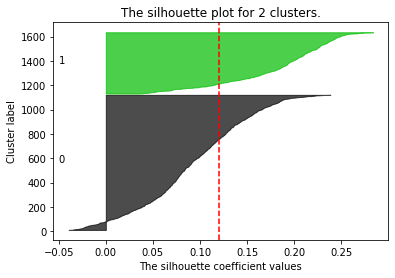

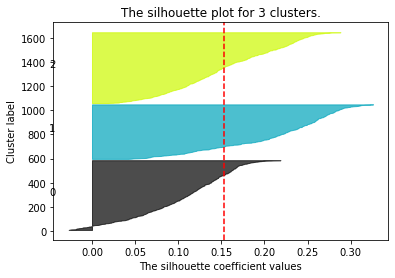

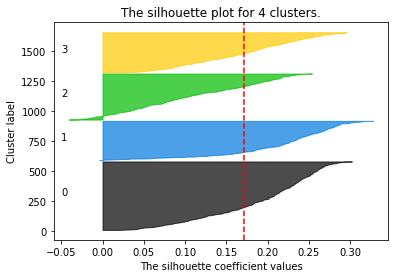

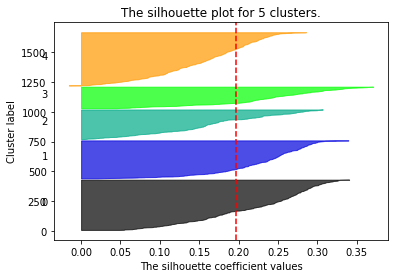

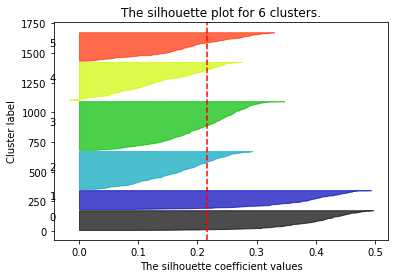

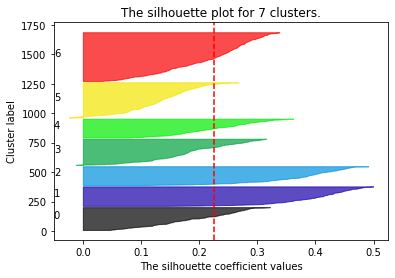

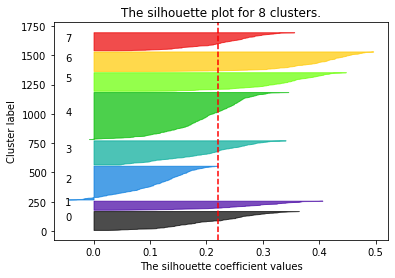

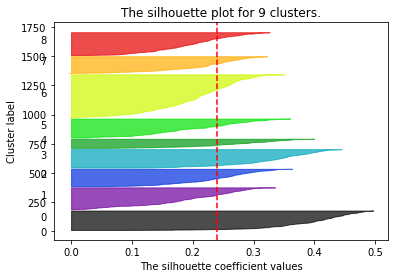

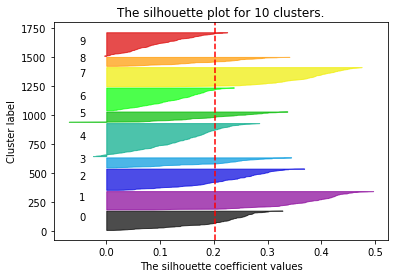

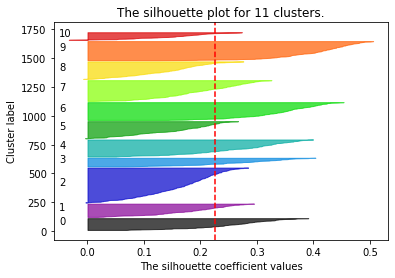

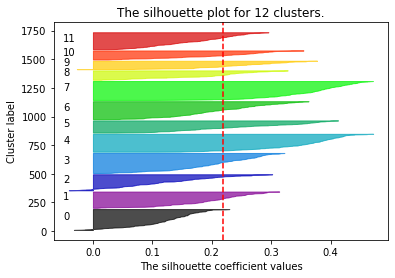

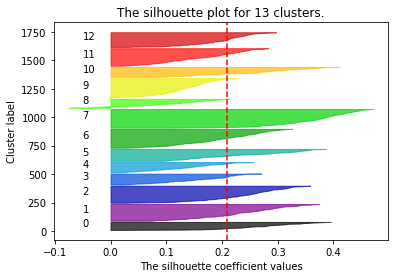

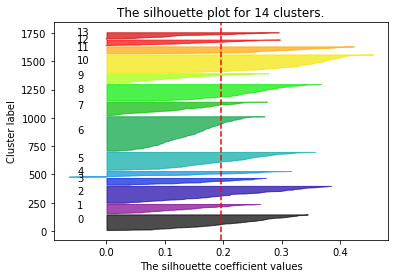

In [36]:
for num_clusters in range (2, 15):
    k = KMeans(X=X_train, n_clusters=num_clusters)
    k.init_centroids()
    k.fit()
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    print(f"For {num_clusters} clusters, got silhouette score of {silhouette_avg}")

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_values = s[i]
        ith_cluster_values.sort()
        size_cluster_i = len(ith_cluster_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for {num_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    c = k.clusters()
    colors = cm.nipy_spectral(c.astype(float) / num_clusters)
    # ax2.set_title("The clustered data.")
    # ax2.scatter(X_train[:, 0], X_train[:, 1], c=colors) # the data
    # ax2.scatter(k.centroids[:, 0], k.centroids[:, 1], marker='o', c="white", alpha=1, s=250, edgecolor='k')
    # for i, c in enumerate(k.centroids):
        # ax2.scatter(c[0], c[1], marker='$%d$' % i, s=100, alpha=1, edgecolor='k', c='red')

plt.show()

From the elbow and silhouette analysis, we would assume that the optimal amount of clusters would be between 11 and 12. After testing, the best results were achieved with 12 clusters.

We'll run the clustering 100 times and consider the one with the highest silhouette value.

In [37]:
# We'll run the method 100 times, and consider the one with the highest silhouette avg
models = []
for i in range(100):
    k = KMeans(X=X_train, n_clusters=12)
    k.init_centroids()
    k.fit()
    models.append(k)

biggest_s = -1.0
best_k = None
for k in models:
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    if silhouette_avg > biggest_s:
        smallest_s = silhouette_avg
        best_k = k


s = best_k.silhouette_coefficient()
flat_s = [item for sublist in s for item in sublist]
silhouette_avg = np.average(np.array(flat_s))
print("silhouette", silhouette_avg)

silhouette 0.2241038625975286


Since clustering is an unsupervised learning method, we'll need to check which of the labels corresponds to each cluster found.

We'll do that by considering the label that appears more often in the cluster being observed

In [38]:
# since clustering is a unsupervised learning method, we'll need to check which of the labels corresponds to each cluster found
clusters = best_k.clusters()
labels_by_cluster = []
for i in range(best_k.centroids.shape[0]):
    label_for_cluster = np.bincount(y_train[clusters == i]).argmax() # the most common label to appear in the current cluster
    labels_by_cluster.append(label_for_cluster)
print(labels_by_cluster)

[2, 5, 9, 6, 5, 2, 3, 4, 1, 7, 0, 1]


With the labels of each cluster found, let's validate the results found using the test data.

In [39]:
clusters = best_k.clusters(data=X_test) 
success = 0
for i in range(y_test.shape[0]):
    if y_test[i] == labels_by_cluster[clusters[i]]:
        success += 1

print(f"Successes: {success} out of {y_test.shape[0]}")
print(f"Successes rate: {success/y_test.shape[0]}")

Successes: 148 out of 180
Successes rate: 0.8222222222222222


### Applying PCA
To allow for an easier visualization of the clustered data, we'll use PCA to decompose the data into 2 features. So we can visualize 2D scatter plots of the clustering proccess.

In [40]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
df_train_pca = pca.transform(X_train)
df_test_pca = pca.transform(X_test)

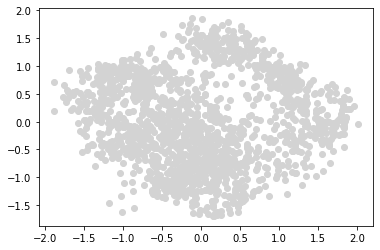

In [41]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

### Original Data Labeling
Let's check how the labels of the training data are distributed in the scatter

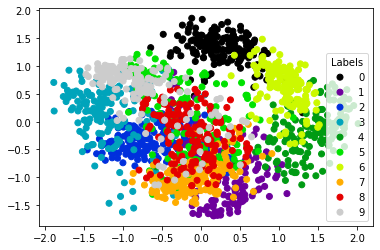

In [42]:
fig, ax = plt.subplots()
colors = cm.nipy_spectral(y_train.astype(float) / y_train.max())
for i in range(10):
    mask = y_train == i
    ax.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], c=colors[mask], label=i) # the data

ax.legend(loc="lower right", title="Labels")

plt.show()

As we can observe, for most features the data is well separated, with the exceptions of the data with labels 5 and 8 that are overlapped. So we would expect most mistakes from the model to happen with those two labels.

In [43]:
models = []
for i in range(100):
    k = KMeans(X=df_train_pca, n_clusters=12)
    k.init_centroids()
    k.fit()
    models.append(k)

biggest_s = -1.0
k_pca = None
for k in models:
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    if silhouette_avg > biggest_s:
        biggest_s = silhouette_avg
        k_pca = k


s = k_pca.silhouette_coefficient()
flat_s = [item for sublist in s for item in sublist]
silhouette_avg = np.average(np.array(flat_s))
print("silhouette", silhouette_avg)

silhouette 0.4856564025364229


In [44]:
# since clustering is a unsupervised learning method, we'll need to check which of the labels corresponds to each cluster found
clusters = k_pca.clusters()
pca_labels_by_cluster = []
for i in range(k_pca.centroids.shape[0]):
    label_for_cluster = np.bincount(y_train[clusters == i]).argmax() # the most common label to appear in the current cluster
    pca_labels_by_cluster.append(label_for_cluster)
print(pca_labels_by_cluster)

[1, 7, 2, 8, 2, 4, 9, 0, 7, 3, 6, 8]


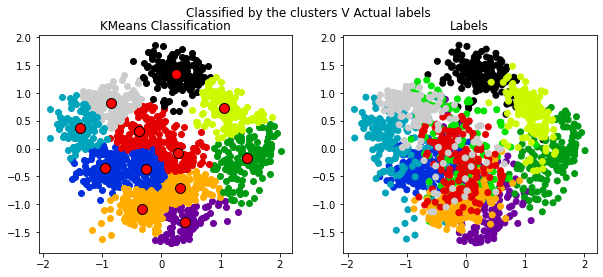

In [45]:
# Result of clusters after fitting is done

c = k_pca.clusters()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Classified by the clusters V Actual labels', fontsize=12)

# ax1.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c=c) # the data

for i in range(k_pca.centroids.shape[0]):
    mask = c == i
    label = pca_labels_by_cluster[i]
    color = cm.nipy_spectral(label / y_train.max())
    ax1.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], color=color) # the data

colors = cm.nipy_spectral(y_train.astype(float) / y_train.max())
for i in range(10):
    mask = y_train == i
    ax2.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], c=colors[mask]) # the data

ax1.scatter(k_pca.centroids[:,:1], k_pca.centroids[:,1:], c="red", s=100, edgecolors='k') # the data

ax1.title.set_text('KMeans Classification')
ax2.title.set_text('Labels')

plt.show()

So we confirm the results found in the previous result. Even though the training is unsupervised, the difference in the images of the handwritten digits are enough that distinct clusters can be found with reasonably small overlapping.

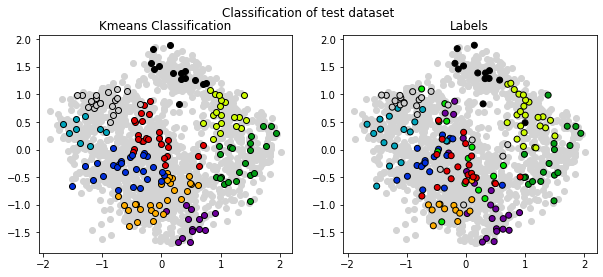

In [46]:
c = k_pca.clusters(data=df_test_pca)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Classification of test dataset', fontsize=12)

ax1.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
ax2.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data

for i in range(k_pca.centroids.shape[0]):
    mask = c == i
    label = pca_labels_by_cluster[i]
    color = cm.nipy_spectral(label / y_test.max())
    ax1.scatter(df_test_pca[mask][:,:1], df_test_pca[mask][:,1:], color=color, edgecolors='k') # the data

colors = cm.nipy_spectral(y_test.astype(float) / y_test.max())
for i in range(10):
    mask = y_test == i
    ax2.scatter(df_test_pca[mask][:,:1], df_test_pca[mask][:,1:], c=colors[mask], edgecolors='k') # the data

ax1.title.set_text('Kmeans Classification')
ax2.title.set_text('Labels')
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

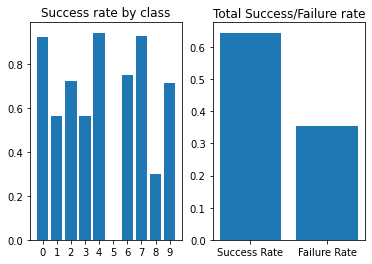

In [47]:
c = k_pca.clusters(data=df_test_pca)
successes = np.empty(10) 
for i in range(10):
    mask = y_test == i
    f = np.vectorize(lambda x: pca_labels_by_cluster[x])
    l = f(c[mask])
    s = np.sum(l == i)
    successes[i] = s / np.sum(mask)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.bar(range(10), successes) # the data
ax1.set_xticks(np.arange(10))
ax1.title.set_text('Success rate by class')

clusters = k_pca.clusters(data=df_test_pca) 
success = 0
for i in range(y_test.shape[0]):
    if y_test[i] == pca_labels_by_cluster[clusters[i]]:
        success += 1

ax2.bar(range(2), [success/y_test.shape[0], 1 - (success/y_test.shape[0])]) # the data
ax2.set_xticks(np.arange(2))
ax2.set_xticklabels(['Success Rate', 'Failure Rate'])
ax2.title.set_text('Total Success/Failure rate')

plt.show()


As expected, since the data for the labels "5" and "8" where considerably overlapped, the classification for the label "5" had by far the worst result when compared to the others.

Now we'll show the results for different number of components with PCA, using the same amount of clusters and training method

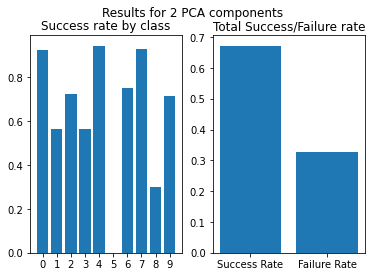

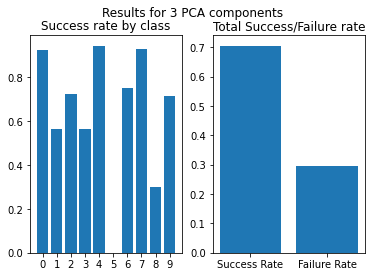

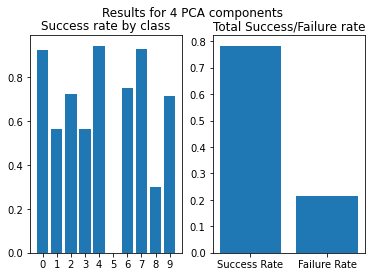

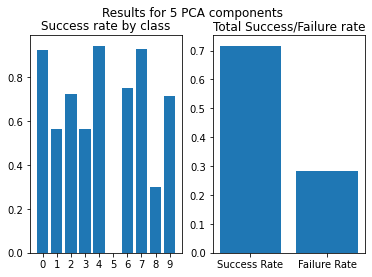

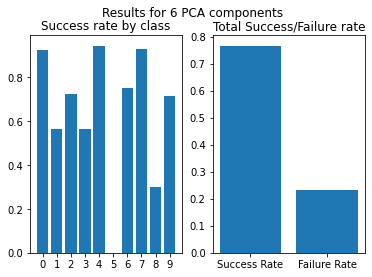

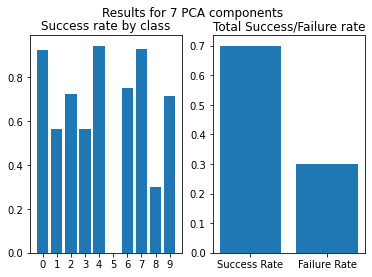

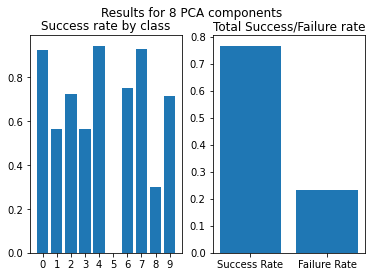

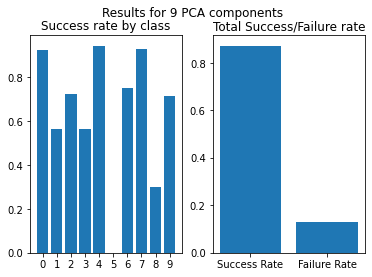

In [48]:

for components in range(2, 10):
    pca = decomposition.PCA(n_components=components)
    pca.fit(X_train)
    df_train_pca = pca.transform(X_train)
    df_test_pca = pca.transform(X_test)
    
    # train 30 models and consider the best one
    models = []
    for i in range(30):
        k = KMeans(X=df_train_pca, n_clusters=12)
        k.init_centroids()
        k.fit()
        models.append(k)

    biggest_s = -1.0
    k_pca = None
    for k in models:
        s = k.silhouette_coefficient()
        flat_s = [item for sublist in s for item in sublist]
        silhouette_avg = np.average(np.array(flat_s))
        if silhouette_avg > biggest_s:
            biggest_s = silhouette_avg
            k_pca = k

    clusters = k_pca.clusters()
    pca_labels_by_cluster = []
    for i in range(k_pca.centroids.shape[0]):
        label_for_cluster = np.bincount(y_train[clusters == i]).argmax() # the most common label to appear in the current cluster
        pca_labels_by_cluster.append(label_for_cluster)

    # plot results
    fig, (ax1, ax2) = plt.subplots(1,2)

    ax1.bar(range(10), successes) # the data
    ax1.set_xticks(np.arange(10))
    ax1.title.set_text('Success rate by class')

    clusters = k_pca.clusters(data=df_test_pca) 
    success = 0
    for i in range(y_test.shape[0]):
        if y_test[i] == pca_labels_by_cluster[clusters[i]]:
            success += 1

    fig.suptitle(f"Results for {components} PCA components", fontsize=12)
    ax2.bar(range(2), [success/y_test.shape[0], 1 - (success/y_test.shape[0])])
    ax2.set_xticks(np.arange(2))
    ax2.set_xticklabels(['Success Rate', 'Failure Rate'])
    ax2.title.set_text('Total Success/Failure rate')

plt.show()


As we can see, increasing the amount of components for the PCA improves the final results in testing, with the best results achieved with 8 components.